1. Данные о продажах видеоигр в разных регионах. Представлена информация продаж Америки, Европы, Японии, остальных и общемировая. Датасет взят с сайта www.kaggle.com, вот ссылка на сам датасет: https://www.kaggle.com/datasets/gregorut/videogamesales/data
Данные реальны.
2. Преедставленны как числовые, так и строковый, но работать будет работать исключительно с числовыми
Rank - топ по продажам - числовой
Name - наименование видеоигры - строковый
Platform - платформа, на которой игра выпускалась - строковый
Year - год выхода - числовой
Genre - жанр - строковый
Publisher - издатель - строковый
NA_Sales - продажи в Америке (в миллионах) - числовой
EU_Sales - продажи в Европе (в миллионах) - числовой
JP_Sales - продажи в Японии (в миллионах) - числовой
Other_Sales - продажи в остальных частях всета (в миллионах) - числовой
Global_Sales - Общемировые продажи. - числовой

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [86]:
def findOutliers(arr, outliers):
    sorted = np.sort(arr)
    q1 = np.ceil(25/100*len(sorted))
    q3 = np.ceil(75/100*len(sorted))
    iqr = q3-q1

    lowerBound = sorted[int(q1)]-1.5*sorted[int(iqr)]
    upperBound = sorted[int(q3)]+1.5*sorted[int(iqr)]

    i = 0
    while sorted[i] < lowerBound:
        outliers.append(sorted[i])
        i += 1

    i = -1
    while upperBound < sorted[i]:
        outliers.append(sorted[i])
        i -= 1

    return outliers

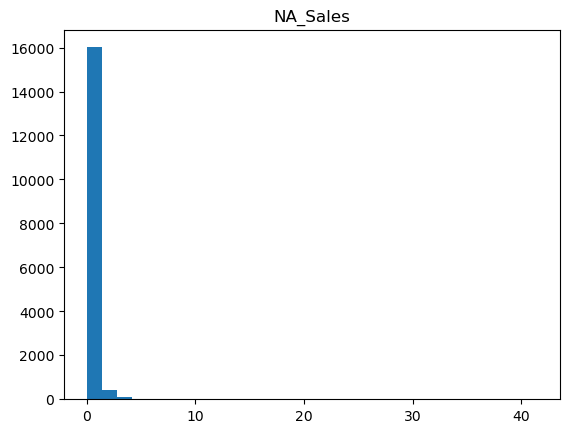

Среднее значение: 0.26466742981082064
СКО: 0.816658427077811
Пропущенные значения: 0
Выбросы: 2866


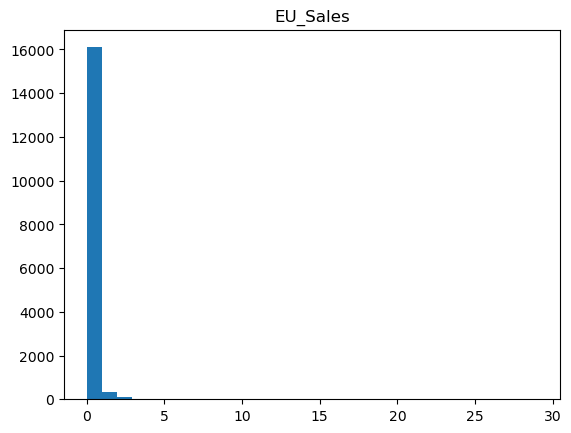

Среднее значение: 0.14665200626581515
СКО: 0.5053360078008547
Пропущенные значения: 0
Выбросы: 3496


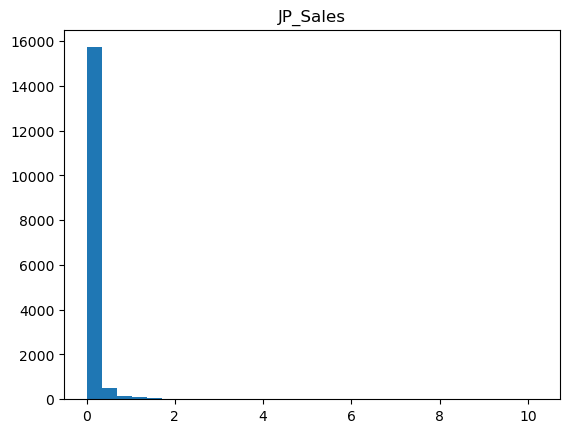

Среднее значение: 0.077781660441017
СКО: 0.3092813308359451
Пропущенные значения: 0
Выбросы: 3786


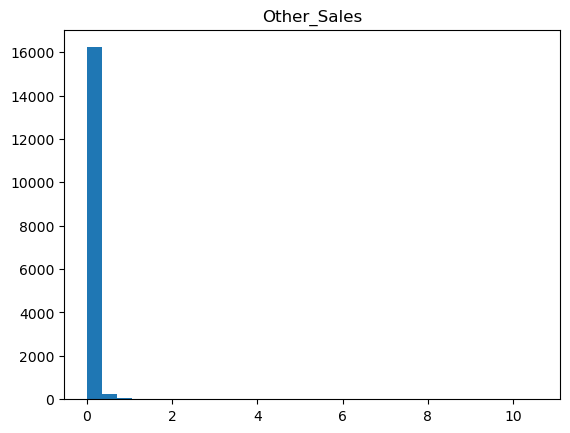

Среднее значение: 0.0480630196409206
СКО: 0.1885827217690971
Пропущенные значения: 0
Выбросы: 3001


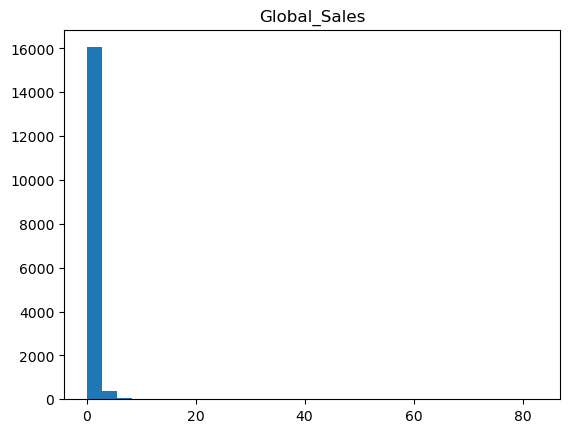

Среднее значение: 0.5374406555006628
СКО: 1.5549810910296606
Пропущенные значения: 0
Выбросы: 2821


In [94]:
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.hist(df[sales_columns[i]], bins=30);
    plt.title(sales_columns[i])
    plt.show()

    avg_Sales = np.array(df[sales_columns[i]])
    avg_SalesMean = avg_Sales.mean()
    print('Среднее значение: ' + str(avg_SalesMean))
    avg_SalesSko = np.std(avg_Sales)
    print('СКО: ' + str(avg_SalesSko))
    print('Пропущенные значения: ' + str(df[sales_columns[i]].isna().sum()))

    outliers = []
    findOutliers(avg_Sales, outliers)
    print('Выбросы: ' + str(len(outliers)))

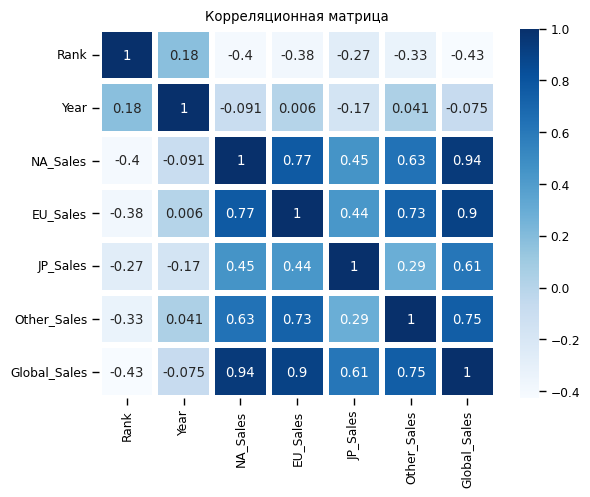

In [125]:
dfNum = df.select_dtypes(include="number")
sns.set_context('paper')
sns.heatmap(dfNum.corr(), cmap = "Blues", annot = True, linewidth=3)
plt.title("Корреляционная матрица")
plt.show()

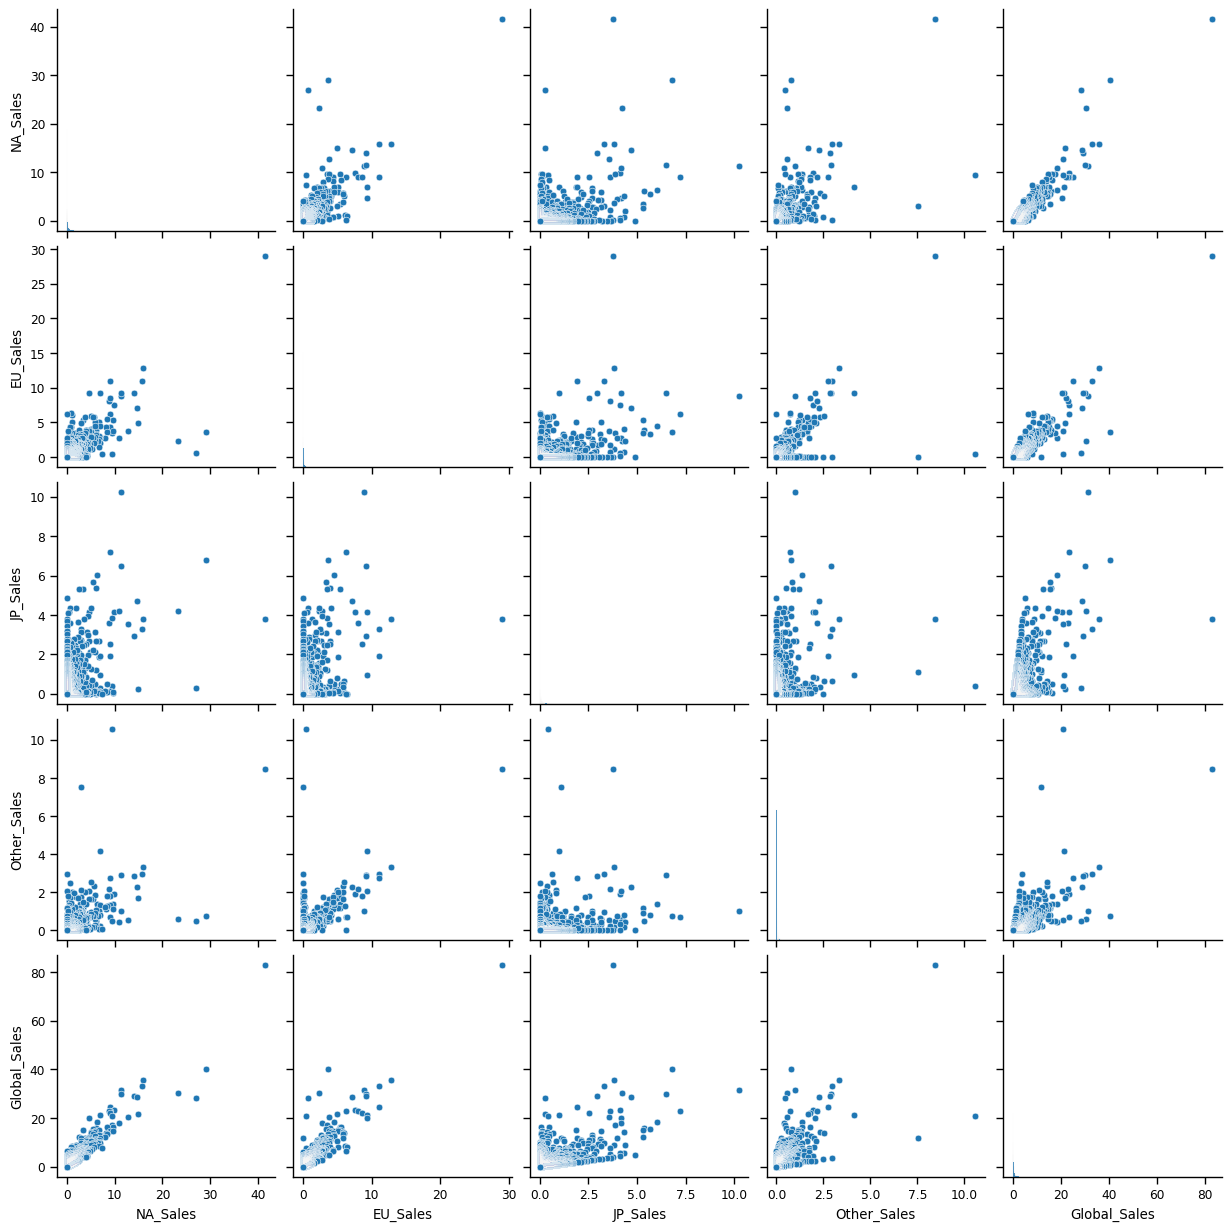

In [137]:
df_Sales = dfNum
df_Sales.drop(['Rank'], axis=1, inplace = True)
df_Sales.drop(['Year'], axis=1, inplace = True)
df_Sales.head()
sns.pairplot(df_Sales)